# Iris -Decision Tree

Objective: Develop a decision tree model that can predict the species of iris flowers based on their sepal and petal measurements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.shape

(150, 5)

### Data Cleaning

In [5]:
iris.isna().sum()
#no missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
iris.duplicated().sum()

1

In [8]:
duplicate_values = iris[iris.duplicated(keep=False)]
duplicate_values

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [9]:
iris=iris.drop_duplicates()
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
iris['species']=labelencoder.fit_transform(iris['species'])
iris

C:\Users\admin\AppData\Local\Temp\ipykernel_15456\4119614631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['species']=labelencoder.fit_transform(iris['species'])


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
iris.species.value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

In [12]:
# Retrieve the original categories
original_categories = labelencoder.inverse_transform(range(len(labelencoder.classes_)))

# Display the encoded values along with their original categories
for encoded_value, category in zip(range(len(labelencoder.classes_)), original_categories):
    print(f"{encoded_value}: {category}")

0: setosa
1: versicolor
2: virginica


### Decision Tree

In [13]:
#splitting features as x and y
y=iris.species
x=iris.iloc[:,0:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)


In [15]:
# #Decision tree
# from sklearn import tree,metrics,model_selection,preprocessing
# from IPython.display import Image, display
# dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=3,max_features='sqrt')

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,metrics,model_selection,preprocessing
from IPython.display import Image, display
dtree = DecisionTreeClassifier(
    criterion="gini",            # Split criterion: "gini" or "entropy"
    max_depth=3,                 # Maximum depth of the tree
    max_features='sqrt',         # Maximum number of features to consider for splitting
    min_samples_split=2,         # Minimum number of samples required to split an internal node
    min_samples_leaf=1,          # Minimum number of samples required to be at a leaf node
    min_impurity_decrease=0.0,   # Minimum impurity decrease required for a split
    random_state=42              # Random seed for reproducibility
)

In [17]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=42)

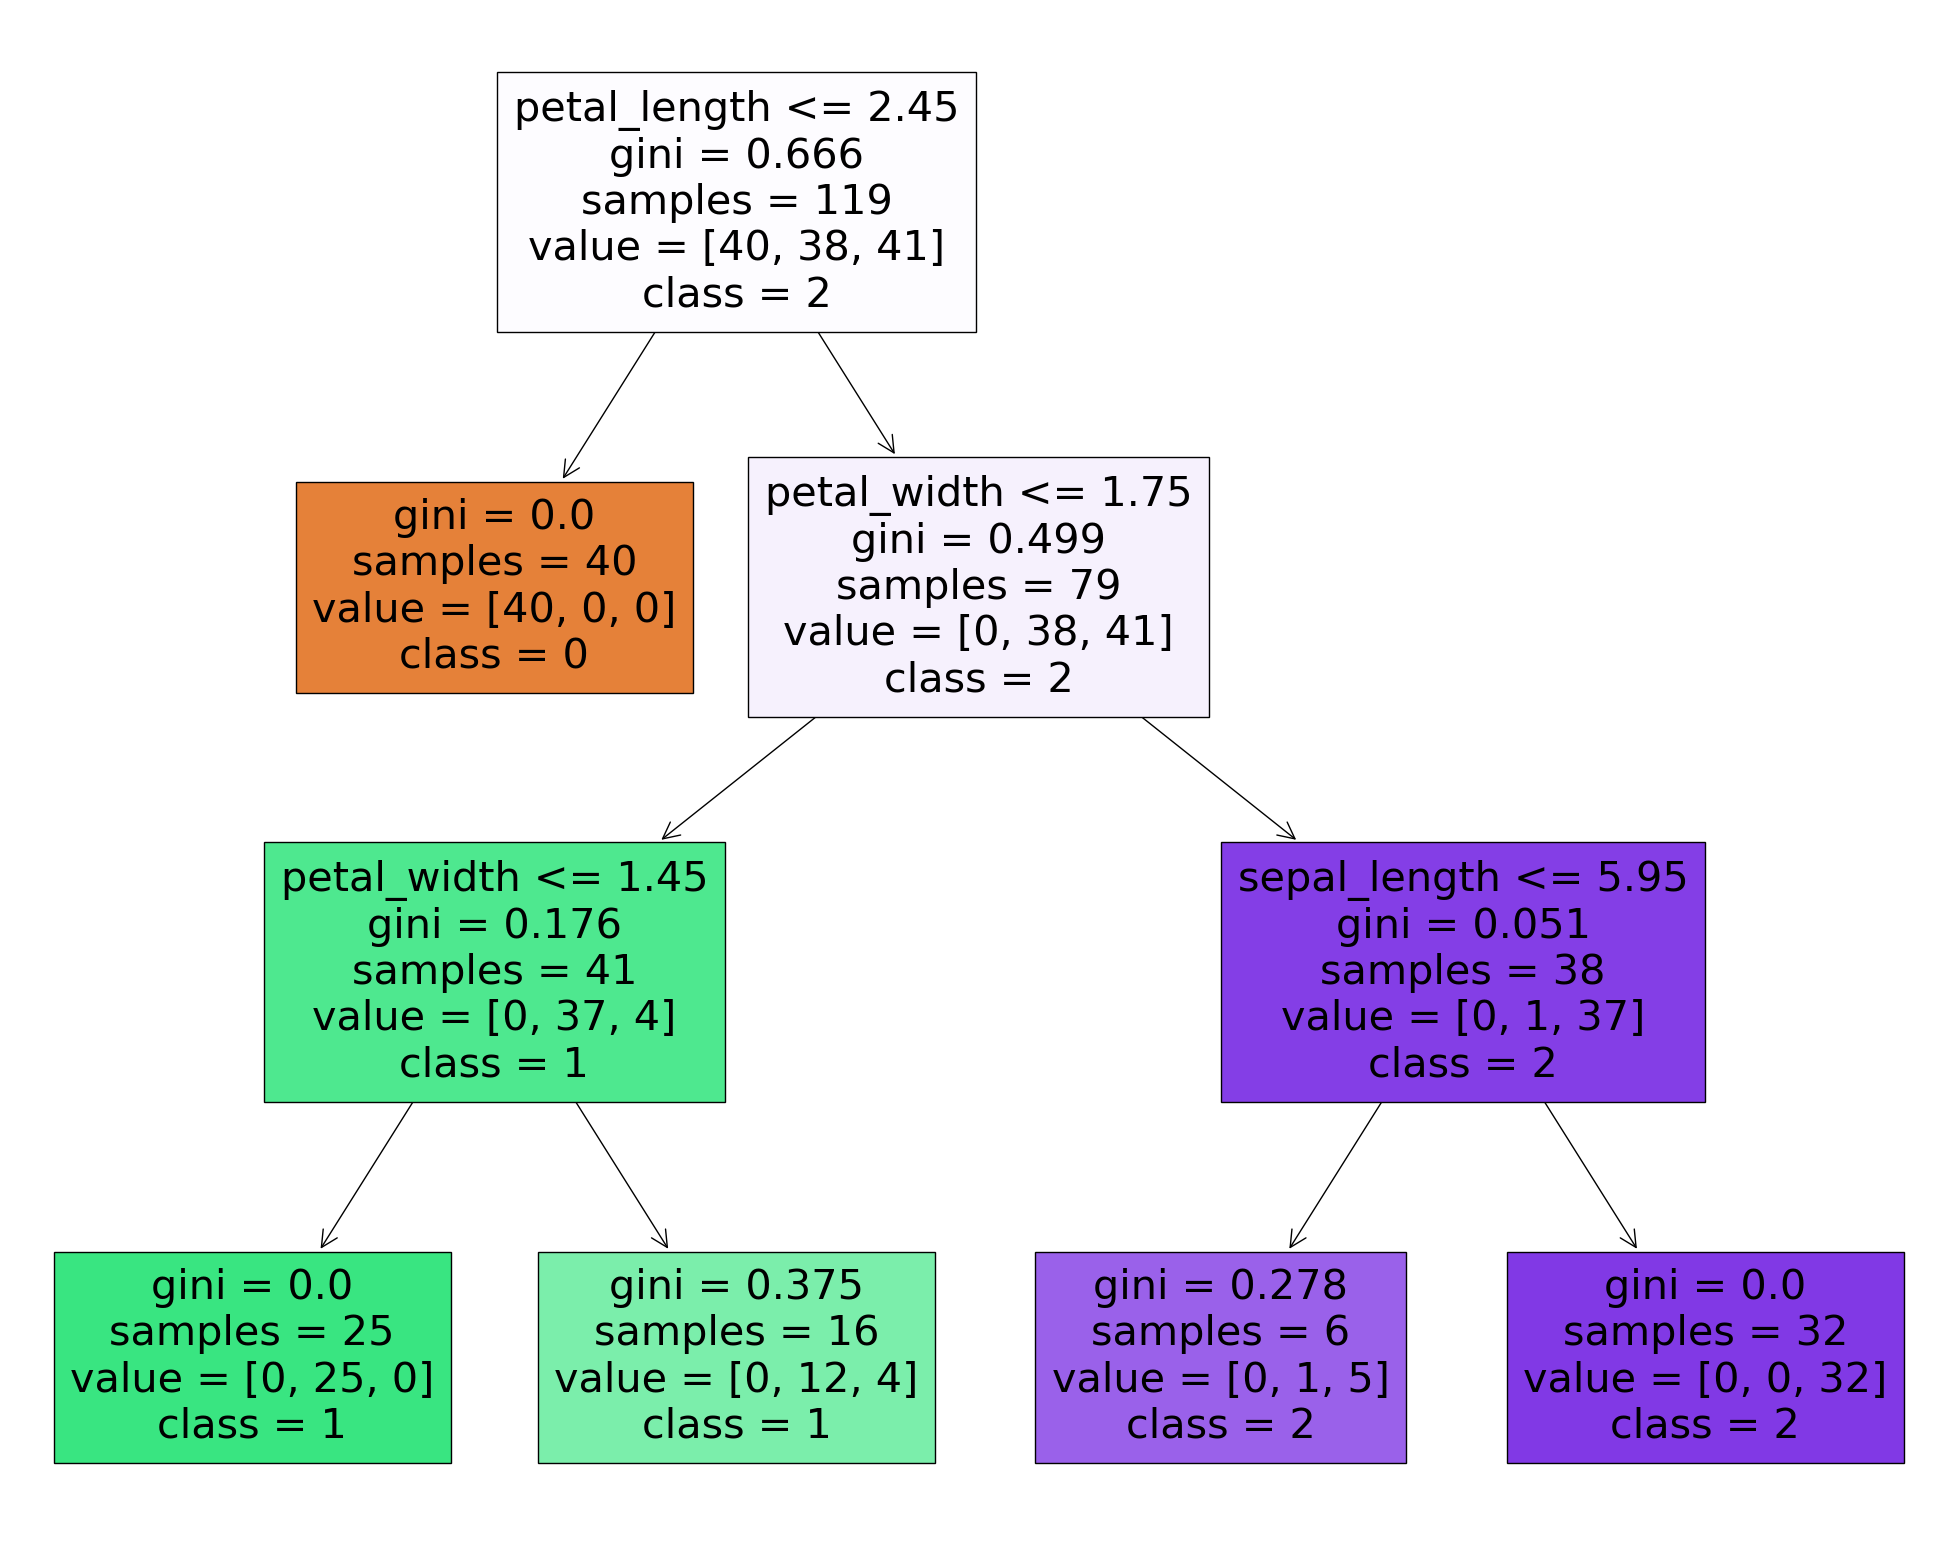

In [18]:
from sklearn import tree
# Convert Index object to list
feature_names = x_train.columns.tolist()

fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(dtree, 
                   feature_names=feature_names,  
                   class_names=['0','1','2'],
                   filled=True)

In [19]:
y_train_pred = dtree.predict(x_train)
y_train_pred

array([1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0,
       2, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2,
       0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1,
       2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 1,
       2, 1, 2, 2, 1, 1, 0, 2, 1])

In [20]:
y_train_pred.shape

(119,)

In [21]:
crosstab=pd.crosstab(y_train,y_train_pred)
crosstab

col_0,0,1,2
species,,,
0,40,0,0
1,0,37,1
2,0,4,37


In [22]:
crosstab.columns = ['setosa', 'versicolor', 'virginica']
crosstab.index = ['setosa', 'versicolor', 'virginica']
crosstab


,setosa,versicolor,virginica
setosa,40,0,0
versicolor,0,37,1
virginica,0,4,37


In [23]:
pd.DataFrame(y_train,y_train_pred)

,species
1,0
1,0
2,0
2,0
1,0
...,...
1,0
1,0
0,0
2,0


In [24]:
y_test_pred = dtree.predict(x_test)

In [25]:
crosstab_test=pd.crosstab(y_test,y_test_pred)
crosstab_test.columns = ['setosa', 'versicolor', 'virginica']
crosstab_test.index = ['setosa', 'versicolor', 'virginica']
crosstab_test


,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,12,0
virginica,0,1,7


### Model Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#### Confusion Matrix

In [27]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[40,  0,  0],
       [ 0, 37,  1],
       [ 0,  4, 37]], dtype=int64)

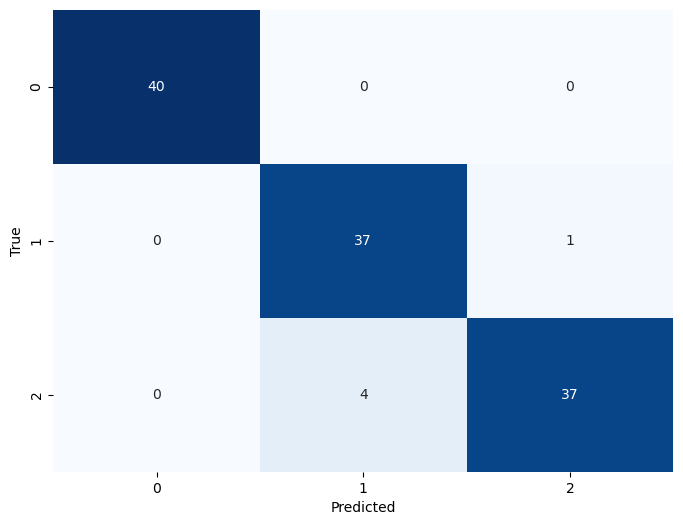

In [28]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The confusion matrix for the training set showcases the performance of our classifier in classifying iris flowers into their respective species. With high diagonal counts indicating accurate predictions, such as 40 instances of one species correctly classified, and limited off-diagonal counts signifying misclassifications, notably only one instance of another species misclassified, our model demonstrates robust accuracy and effectiveness in learning from the training data. 

In [29]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

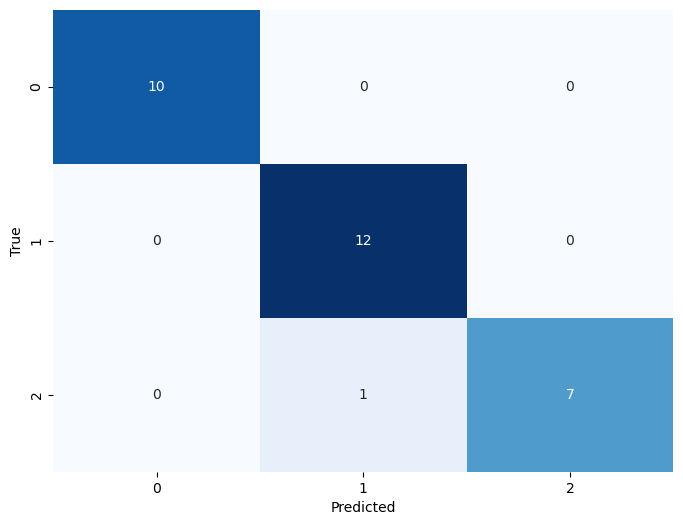

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

With high diagonal counts indicating correct predictions, such as 10 instances of setosa correctly classified, and minimal off-diagonal counts denoting misclassifications, notably only one instance of versicolor misclassified as virginica, our model demonstrates strong accuracy and effectiveness in distinguishing between iris species.

#### Accuracy 

In [31]:
dtree.score(x_train,y_train)

0.957983193277311

In [32]:
dtree.score(x_test,y_test)

0.9666666666666667

In [33]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.957983193277311

In [34]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.9666666666666667

#### Recall Score

In [35]:
train_recall = recall_score(y_train, y_train_pred,average='macro')
train_recall

0.9587077449721866

In [36]:
test_recall = recall_score(y_test, y_test_pred,average='macro')
test_recall

0.9583333333333334

With values of approximately 95.87% for the training set and 95.83% for the test set, our classifier demonstrates consistent performance in recalling instances across all classes. 

#### Precision Score

In [37]:
train_precision = precision_score(y_train, y_train_pred,average='macro')
train_precision

0.9587077449721866

In [38]:
test_precision = precision_score(y_test, y_test_pred,average='macro')
test_precision

0.9743589743589745

With values of approximately 95.87% for the training set and 97.44% for the test set, our classifier demonstrates strong precision in identifying true positives while minimizing false positives. 

#### F1 Score

In [39]:
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_f1

0.9578059071729959

In [40]:
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_f1

0.9644444444444445

The F1 scores obtained from both the training and test datasets highlight the balance between precision and recall achieved by our classifier. With values of approximately 95.78% for the training set and 96.44% for the test set, our model demonstrates strong performance in achieving high precision while maintaining a high recall rate.